# Analyzing Size of Armed Forces From 1947 - 1963 with statsmodels

This post includes code adapted from [python for finance and trading algorithms udemy course](https://udemy.com/python-for-finance-and-trading-algorithms/) and [python for finance and trading algorithms udemy course notebooks](https://github.com/theoneandonlywoj/Python-for-Financial-Analysis-and-Algorithmic-Trading).

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline


df = sm.datasets.longley.load_pandas().data

#print(sm.datasets.longley.NOTE)

In [15]:
df.head()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


In [16]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1947', '1962'))
df.index = index
df.head()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
1947-12-31,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1948-12-31,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
1949-12-31,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
1950-12-31,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
1951-12-31,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


Text(0, 0.5, 'ARMED')

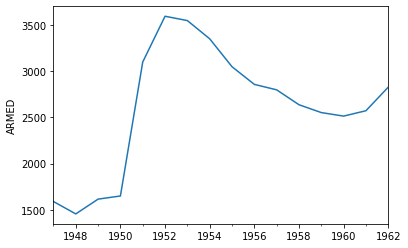

In [17]:
df['ARMED'].plot()
plt.ylabel("ARMED")

In [18]:
# unpacking
cycle, trend = sm.tsa.filters.hpfilter(df.ARMED)

cycle

1947-12-31    -497.642333
1948-12-31    -713.661033
1949-12-31    -635.368706
1950-12-31    -682.008289
1951-12-31     688.574390
1952-12-31    1108.959755
1953-12-31     992.297873
1954-12-31     731.045710
1955-12-31     370.040046
1956-12-31     124.660757
1957-12-31      15.056446
1958-12-31    -193.702199
1959-12-31    -324.553899
1960-12-31    -407.316313
1961-12-31    -393.604252
1962-12-31    -182.777954
Name: ARMED, dtype: float64

In [19]:
type(cycle)

pandas.core.series.Series

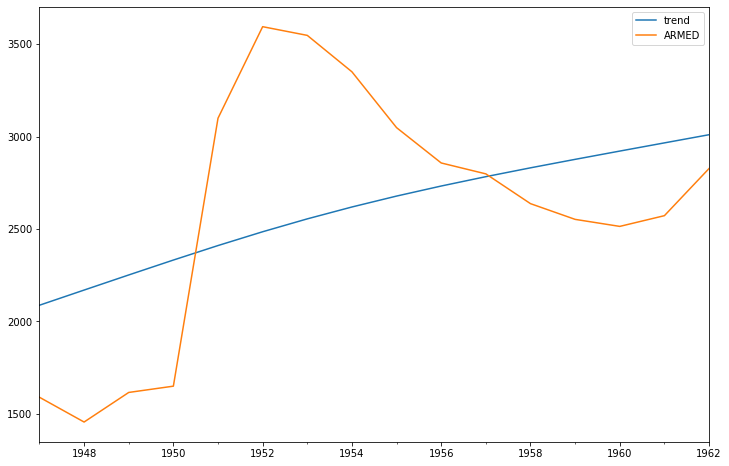

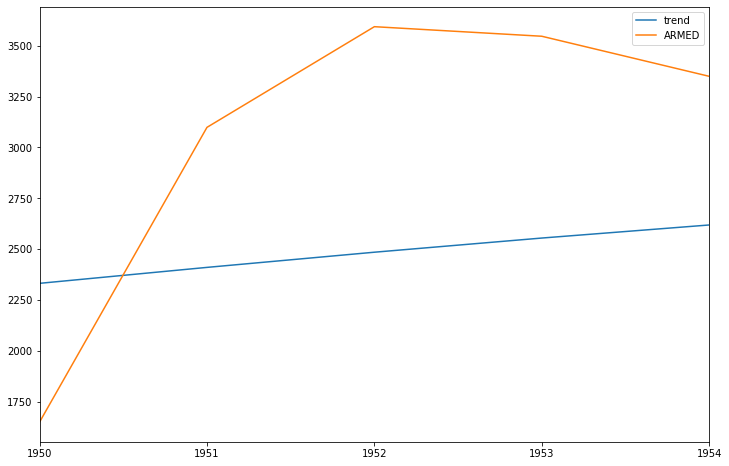

In [20]:
df["trend"] = trend

df[['trend','ARMED']].plot(figsize = (12, 8))

df[['trend','ARMED']]["1950-01-01":"1955-01-01"].plot(figsize = (12, 8))